In [35]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,log_loss,confusion_matrix)

#supress warnings
import warnings
warnings.filterwarnings('ignore')

### Step-1 Loading Dataset

In [36]:
## Importing the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


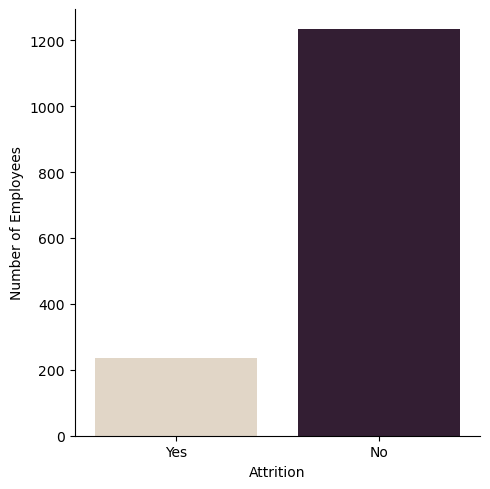

In [37]:
#Checking the number o f 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x='Attrition',kind='count',palette="ch:.25",data=df);
ax.set(xlabel='Attrition',ylabel='Number of Employees')
plt.show()

In [38]:
#Identifying columns with missing information
missing_col = df.columns[df.isnull().any()].values
print('The missing columns in the dataset are:',missing_col)

The missing columns in the dataset are: []


In [39]:
#Checking datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Step-2 Feature Engineering

In [41]:
df.shape

(1470, 35)

In [42]:
df['JobRole']

0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object

In [43]:
#Extracting the Numeric and Categorical feautures
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data=df.select_dtypes(include=['object']))
print('Shape of Numeric:',df_num.shape)
print('Shape of Categorical:',df_cat.shape)

Shape of Numeric: (1470, 26)
Shape of Categorical: (1470, 9)


### 2.1 Encoding Categorical Fields

In [44]:
# Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'],axis=1)

#Encoding using get_dummies
df_cat_encoded = pd.get_dummies(df_cat,drop_first=True)
df_cat_encoded.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


### 2.2 Scaling the Numerical Fields

In [45]:
#Using StandardScaler to scale the numeric features
standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data=df_num_scaled,columns = df_num.columns,index =df_num.index)
print('Shape of Numeric After Scaling:',df_num_scaled.shape)
print('Shape of Categorical after Encoding:',df_cat_encoded.shape)

Shape of Numeric After Scaling: (1470, 26)
Shape of Categorical after Encoding: (1470, 21)


In [46]:
#Combining the categorical and Numerical features
df_transformed_final = pd.concat([df_num_scaled,df_cat_encoded],axis=1)
print('Shape of final dataframe:',df_transformed_final.shape)

Shape of final dataframe: (1470, 47)


In [47]:
#Extracting the target variable -'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1,'No':0}
target = target.apply(lambda x:map[x])

print('Shape of Target:',target.shape)

X = df_transformed_final
y = target

Shape of Target: (1470,)


### 2.3 Train and Test split

In [48]:
#Splitting into train and test dataset in 80-20 ration
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0,stratify=y)
print('Shape of X Train:',X_train.shape)
print('Shape of X Test:',X_test.shape)
print('Shape of y Train:', y_train.shape)
print('Shape of y Test:',y_test.shape)

Shape of X Train: (1176, 47)
Shape of X Test: (294, 47)
Shape of y Train: (1176,)
Shape of y Test: (294,)


### Step-3 Model Fitting

### Ada Boost Classifier

In [49]:
#Using adaboosting to predict 'Attrition'
adaboost = AdaBoostClassifier(n_estimators=200,random_state=1)

In [50]:
#Fitting Model
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [51]:
# pred
y_pred = adaboost.predict(X_test)

In [52]:
print('Accuracy of the model is:',accuracy_score(y_test,y_pred))

Accuracy of the model is: 0.8537414965986394


In [53]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print('The confusion Matrix is:\n',cm)

The confusion Matrix is:
 [[237  10]
 [ 33  14]]


In [54]:
#checking out the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.73      0.63      0.66       294
weighted avg       0.83      0.85      0.83       294



### XG Boost

In [55]:
import xgboost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb_cfl = XGBClassifier(n_jobs=-1,objective ='binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [58]:
#Fit the model to our train and target
xgb_cfl.fit(X_train,y_train)

#Get our predictions
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[9.99529362e-01, 4.70648956e-04],
       [9.99233365e-01, 7.66632031e-04],
       [9.85095739e-01, 1.49042634e-02],
       [9.83392537e-01, 1.66074391e-02],
       [9.99736965e-01, 2.63006281e-04],
       [9.14043844e-01, 8.59561786e-02],
       [8.76631498e-01, 1.23368531e-01],
       [9.70631778e-01, 2.93682404e-02],
       [9.94744301e-01, 5.25567681e-03],
       [9.97479856e-01, 2.52014003e-03],
       [8.01618159e-01, 1.98381826e-01],
       [9.99712646e-01, 2.87373085e-04],
       [9.99743879e-01, 2.56148545e-04],
       [9.18906808e-01, 8.10931772e-02],
       [1.91588283e-01, 8.08411717e-01],
       [7.16701388e-01, 2.83298582e-01],
       [9.78989542e-01, 2.10104808e-02],
       [9.83614624e-01, 1.63853485e-02],
       [9.99065399e-01, 9.34616139e-04],
       [9.93522525e-01, 6.47748960e-03],
       [9.90093350e-01, 9.90667101e-03],
       [9.98484731e-01, 1.51527557e-03],
       [9.96631384e-01, 3.36864032e-03],
       [9.99632120e-01, 3.67891917e-04],
       [9.964770

In [59]:
accuracy_score(y_test,xgb_cfl.predict(X_test))

0.8537414965986394

### Hyper parameter tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[100,200,500,750],
    'learning_rate':[0.01,0.02,0.05,0.1,0.25],
    'min_child_weight':[1,5,7,10],
    'gamma':[0.1,0.5,1,1.5,5],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'max_depth':[3,4,5,10,12]
}

folds = 5
# param_comb = 800
random_search = RandomizedSearchCV(xgb_cfl,param_distributions=params,n_jobs=-1,cv=3,verbose=1)

In [62]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [63]:
print('\nBest estimator:')
print(random_search.best_estimator_)


Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


In [64]:
random_search.best_score_

0.8758600793364586

In [65]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 10,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

In [67]:
xgb_predictions_hpt = random_search.best_estimator_
xgb_predictions_hpt.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
best_pred = xgb_predictions_hpt.predict(X_test)
accuracy_score(y_test,best_pred)

0.8469387755102041

### Feature importance Xgboost Model

In [69]:
xgb_cfl.feature_importances_


array([0.02132743, 0.01706626, 0.02015383, 0.01192762, 0.        ,
       0.01487027, 0.02697625, 0.01707138, 0.01958158, 0.01642503,
       0.02408733, 0.03491256, 0.01657316, 0.02919104, 0.01682141,
       0.        , 0.01633319, 0.        , 0.04874043, 0.03110666,
       0.01684525, 0.03230844, 0.02144257, 0.02735448, 0.02765576,
       0.01932128, 0.02907609, 0.01081938, 0.01672755, 0.04035029,
       0.02201004, 0.04180257, 0.02054   , 0.        , 0.01384534,
       0.00808904, 0.        , 0.01379827, 0.04358251, 0.        ,
       0.        , 0.02915518, 0.02832179, 0.02777098, 0.01395018,
       0.04568392, 0.06638373], dtype=float32)

In [71]:
pd.DataFrame({'Feature':X_train.columns,
             'Imp': xgb_cfl.feature_importances_}).sort_values(by='Imp',ascending=False)

,Feature,Imp
46,OverTime_Yes,0.066384
18,StockOptionLevel,0.048740
45,MaritalStatus_Single,0.045684
38,JobRole_Manager,0.043583
31,EducationField_Marketing,0.041803
29,Department_Sales,0.040350
11,MonthlyIncome,0.034913
21,WorkLifeBalance,0.032308
19,TotalWorkingYears,0.031107
13,NumCompaniesWorked,0.029191
